# 3: Language Model Analysis using BERT

In [15]:
# !pip install transformers torch matplotlib seaborn nltk scikit-learn

In [16]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity

In [17]:
# Load Pretrained BERT Model and Tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [18]:
# Text Input and Tokenization
texts = [
    "Artificial Intelligence is transforming the world.",
    "AI is changing industries rapidly.",
    "I love playing football."
]

encoded_input = tokenizer(
    texts,
    padding=True,
    truncation=True,
    return_tensors="pt"
)

with torch.no_grad():
    outputs = model(**encoded_input)

In [19]:
# Extract Sentence Embeddings
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0]
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size())
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

sentence_embeddings = mean_pooling(outputs, encoded_input["attention_mask"])

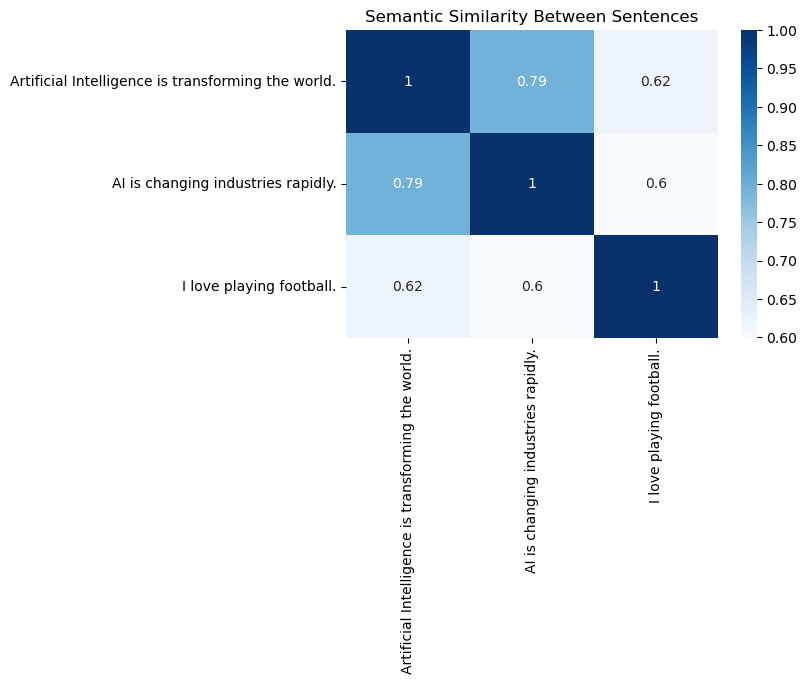

In [20]:
# Semantic Similarity Analysis
similarity_matrix = cosine_similarity(sentence_embeddings)

plt.figure(figsize=(6,4))
sns.heatmap(similarity_matrix, annot=True, cmap="Blues",
            xticklabels=texts, yticklabels=texts)
plt.title("Semantic Similarity Between Sentences")
plt.show()

In [21]:
# Contextual Understanding Demonstration
context_examples = [
    "He went to the bank to deposit money.",
    "The river bank was flooded after heavy rain."
]

inputs = tokenizer(context_examples, return_tensors="pt", padding=True)

with torch.no_grad():
    outputs = model(**inputs)

embeddings = mean_pooling(outputs, inputs["attention_mask"])
cosine_similarity(embeddings)

array([[0.99999994, 0.56954294],
       [0.56954294, 0.99999994]], dtype=float32)

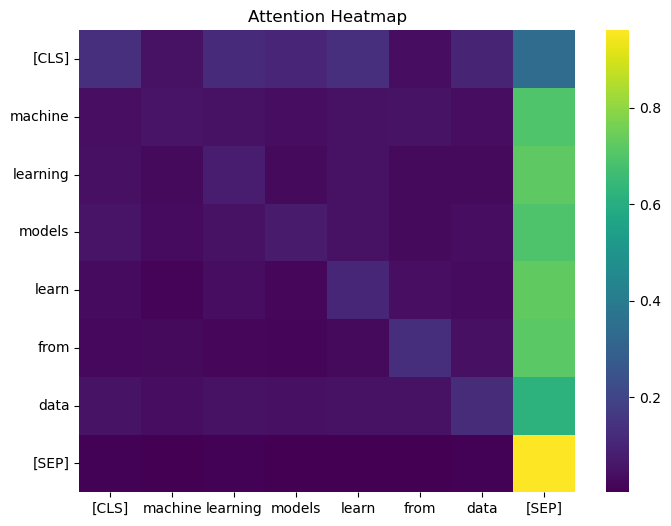

In [22]:
# Attention Visualization
text = "Machine learning models learn from data"
inputs = tokenizer(text, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs, output_attentions=True)

attention = outputs.attentions[-1][0].mean(dim=0).numpy()

tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

plt.figure(figsize=(8,6))
sns.heatmap(attention, xticklabels=tokens, yticklabels=tokens, cmap="viridis")
plt.title("Attention Heatmap")
plt.show()

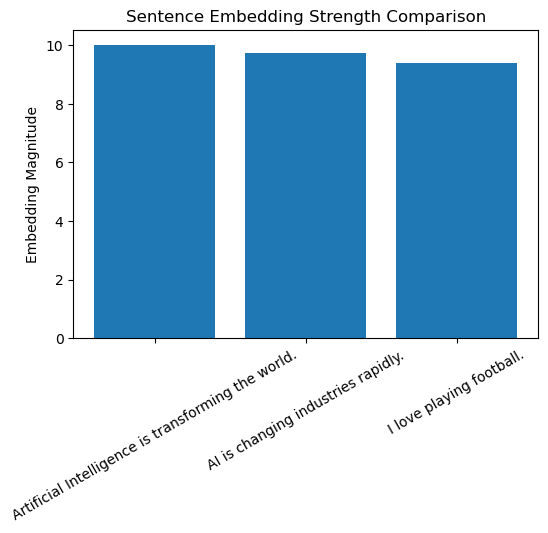

In [27]:
# Sentence Embedding Magnitude Comparison
embedding_norms = torch.norm(sentence_embeddings, dim=1).numpy()

plt.figure(figsize=(6,4))
plt.bar(range(len(texts)), embedding_norms)
plt.xticks(range(len(texts)), texts, rotation=30)
plt.ylabel("Embedding Magnitude")
plt.title("Sentence Embedding Strength Comparison")
plt.show()

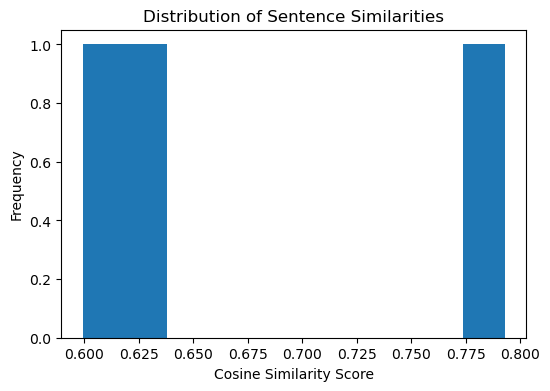

In [29]:
# Pairwise Similarity Distribution
similarities = similarity_matrix[np.triu_indices(len(texts), k=1)]

plt.figure(figsize=(6,4))
plt.hist(similarities, bins=10)
plt.xlabel("Cosine Similarity Score")
plt.ylabel("Frequency")
plt.title("Distribution of Sentence Similarities")
plt.show()

In [23]:
# Research Questions
research_questions = [
    "How well does BERT capture contextual meaning?",
    "Can BERT differentiate semantically similar and dissimilar sentences?",
    "What are the limitations of BERT in text generation?",
    "How adaptable is BERT across domains?"
]

for q in research_questions:
    print("-", q)

- How well does BERT capture contextual meaning?
- Can BERT differentiate semantically similar and dissimilar sentences?
- What are the limitations of BERT in text generation?
- How adaptable is BERT across domains?


In [24]:
# Model Strengths and Limitations
strengths = [
    "Strong contextual understanding",
    "Bidirectional attention",
    "Excellent semantic representations"
]

limitations = [
    "Cannot generate text",
    "High computational cost",
    "Limited sequence length"
]

print("Strengths:")
for s in strengths:
    print("-", s)

print("\nLimitations:")
for l in limitations:
    print("-", l)

Strengths:
- Strong contextual understanding
- Bidirectional attention
- Excellent semantic representations

Limitations:
- Cannot generate text
- High computational cost
- Limited sequence length


In [25]:
# Ethical Considerations
ethics = [
    "Bias from training data",
    "High energy consumption",
    "Privacy risks in deployment"
]

for e in ethics:
    print("-", e)

- Bias from training data
- High energy consumption
- Privacy risks in deployment


In [26]:
# Conclusion
print("""
This project demonstrated the implementation and analysis of BERT as a
Language Model. Through semantic similarity, attention visualization,
and contextual evaluation, BERT proved effective for NLP understanding tasks.
However, limitations such as lack of text generation and high computation
highlight areas for future improvement.
""")


This project demonstrated the implementation and analysis of BERT as a
Language Model. Through semantic similarity, attention visualization,
and contextual evaluation, BERT proved effective for NLP understanding tasks.
However, limitations such as lack of text generation and high computation
highlight areas for future improvement.

